# _Dataquest: Z-Scores_

This notebook was adapted from Dataquest's lesson _Z-Scores_ within their probability and statistics chapter. It serves as a review to locate and compare values using z-scores.


Helpful Links

- [Glossary of LaTeX](https://github.com/rasbt/pattern_classification/blob/master/resources/latex_equations.md#z-score)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

## _Individual Values_


In [6]:
import pandas as pd

houses = pd.read_csv('data/AmesHousing_1.txt', sep='\t')

# randomly sample one sale price
print(houses['SalePrice'].sample(1, random_state=0))

2216    220000
Name: SalePrice, dtype: int64


- question: is `220000` cheap, expensive, or average-priced?
    - to answer, we can get the mean price of a house (i.e., `180796`)
    - but...is the price slightly or extremely above the average?
- with greater standard deviation, sample is closer to the mean
    - indicates prices are common
- with smaller standard deviation, sample will be farther from mean
    - indicates prices are uncommon

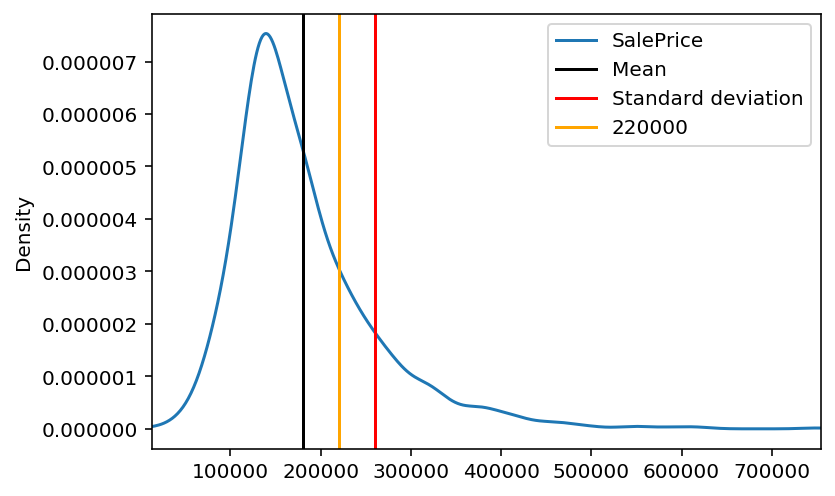

In [7]:
import matplotlib.pyplot as plt

min_price, max_price = houses['SalePrice'].min(), houses['SalePrice'].max()
above_mean = houses['SalePrice'].mean() + houses['SalePrice'].std(ddof=0)
# generate a kernel density plot for SalePrice
houses['SalePrice'].plot.kde(xlim=(min_price, max_price))
# plot vertical line to indicate location of mean
plt.axvline(x=houses['SalePrice'].mean(), color='black', label='Mean')
# plot a vertical line to indicate std above the mean
plt.axvline(x=above_mean, color='red', label='Standard deviation')
# plot a vertical line for 220000 price
plt.axvline(x=220000, color='orange', label='220000')
plt.legend();

In [8]:
# is 220000 price very expensive?
very_expensive = False

## _Number of Standard Deviations_

- need to find faster/more precise way to measure values and their standard deviations
- can measure how far off a value is form the mean _in terms of number of standard deviations_
    - a `SalePrice` that is 4 standard deviations away from the mean is further away than one that is 2 standard deviations away


In [9]:
# measure the distance b/w 220000 and mean SalePrice
dist = 220000 - houses['SalePrice'].mean()

# divide the distance by standard deviation of SalePrice column
st_devs_away = dist / houses['SalePrice'].std(ddof=0)

# print out value
print(round(st_devs_away, 4))

0.4908


## _Z-scores_

$z = \frac{x - \mu}{\sigma}$

- aboves is the equation for the Z-score
    - value representing number of standard deviations away from the mean
    - also called the standard score
    - can also be calculated from samples, just sub $\bar{x}$ for $\mu$
- can be positive/negative
- has two parts
    - _the sign_, indicates whether value is above/below mean
    - _the value_, indicates the number of standard deviations that the values is away from the mean

In [10]:
import numpy as np

# define a function that returns the z-score
def zscore(val, arr, ddof=0):
    '''
    Function that takes in value, array it belongs too and returns z-score.
    '''
    # compute the mean of the array
    mean = sum(arr) / len(arr)
    
    # compute standard deviation of array
    std = np.std(arr, ddof=ddof)

    # compute distance between value and mean
    dist = val - mean

    # compute z-score by dividing distance to std
    z_score = dist / std

    return z_score

# assorted values from SalePrice column
min_val = houses['SalePrice'].min()
mean_val = houses['SalePrice'].mean()
max_val = houses['SalePrice'].max()

# z score for minimum value
min_z = zscore(min_val, houses['SalePrice'])

# z score for the mean
mean_z = zscore(mean_val, houses['SalePrice'])

# z score for max val
max_z = zscore(max_val, houses['SalePrice'])

## _Locating Values in Different Distributions_

- goal below is to find out neighborhoods where $200,000 house is average-price 

- can solve by measuring z-score for a $200,000 value for each neighborhood
    - North Ames, College Creek, Old Town, Edwards, Somerset
    - recommendation: neighborhood with the z-score closest to 0

In [11]:
def z_score(value, array, bessel = 0):
    mean = sum(array) / len(array)
    
    from numpy import std
    st_dev = std(array, ddof = bessel)
    
    distance = value - mean
    z = distance / st_dev
    
    return z

# list of neighborhoods of interest
neighborhoods = ['NAmes',
                 'CollgCr',
                 'OldTown',
                 'Edwards',
                 'Somerst']

z_list = []
for hood in neighborhoods:
    # gather a subset of specific neighborhood
    subset = houses[houses['Neighborhood'] == hood]
    sub_z = z_score(200000, subset['SalePrice'], bessel=0)
    z_list.append(tuple([hood, sub_z]))

def func(x):
    return x[1]

for val in sorted(z_list, key = func):
    print(val)

best_investment = 'College Creek'

('Somerst', -0.5186390646965722)
('CollgCr', -0.03334366282705464)
('Edwards', 1.443576193848941)
('OldTown', 1.7183080926865524)
('NAmes', 1.7239665910370237)


## _Transforming Distributions_

- z-scores often used to transform entire distributions
- below we'll convert entire distribution to z-scores

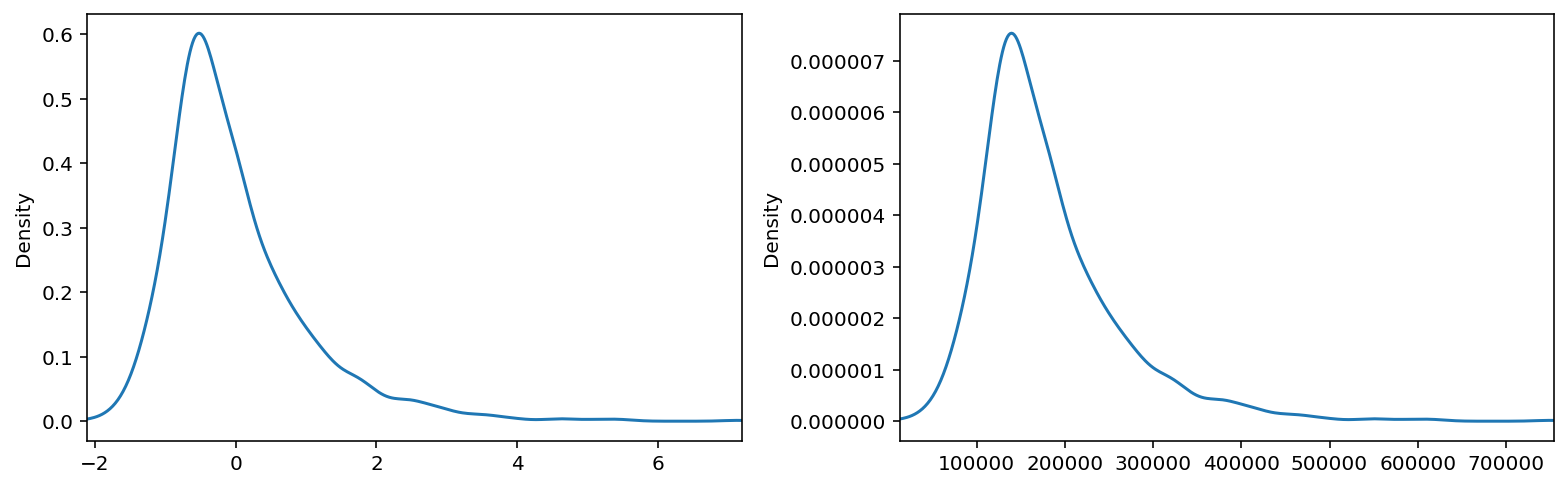

In [12]:
import matplotlib.pyplot as plt

mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof = 0)

houses['z_prices'] = houses['SalePrice'].apply(
    lambda x: ((x - mean) / st_dev)
    )

plt.figure(figsize = (11,3.5))
plt.subplot(1,2,1)
houses['z_prices'].plot.kde(xlim = (houses['z_prices'].min(),
                                houses['z_prices'].max()
                                )
                        )
plt.subplot(1,2,2)
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                    houses['SalePrice'].max()
                                     )
                            )
plt.tight_layout() # otherwise the plots will overlay partially

- notice that shape of initial distribution is preserved in new distribution of z-scores

In [14]:
# compute the mean of z_prices column
z_mean_price = houses['z_prices'].mean()

# compute the standard deviation of z_prices column
z_stdev_price = houses['z_prices'].std(ddof=0)

# transform the distribution of the Lot Area variable into z-score distribution
mean_lot = houses['Lot Area'].mean()
st_dev_lot = houses['Lot Area'].std(ddof = 0)

houses['z_prices_lot'] = houses['Lot Area'].apply(
    lambda x: ((x - mean_lot) / st_dev_lot)
    )

# compute mean of lot area z-scores
z_mean_area = houses['z_prices_lot'].mean()

# compute the standard deviation of lot area z-scores
z_stdev_area = houses['z_prices_lot'].std(ddof=0)

# compute the mean of z_prices column
z_mean_price = houses['z_prices'].mean()

# compute the standard deviation of z_prices column
z_stdev_price = houses['z_prices'].std(ddof=0)

# transform the distribution of the Lot Area variable into z-score distribution
mean_lot = houses['Lot Area'].mean()
st_dev_lot = houses['Lot Area'].std(ddof = 0)
houses['z_prices_lot'] = houses['Lot Area'].apply(lambda x: ((x - mean_lot) / st_dev_lot))

# compute mean of lot area z-scores
z_mean_area = houses['z_prices_lot'].mean()

# compute the standard deviation of lot area z-scores
z_stdev_area = houses['z_prices_lot'].std(ddof=0)

print(z_mean_price, z_mean_area)

-1.1429992333726227e-16 8.771898641662927e-18


## _The Standard Distribution_

- every distribution of z-scores:
    - mean always equal 0, standard deviation always 1
- distribution of z-scores often called _a standard distribution_
    - remember they're also called standard scores
    - statistical jargon, standardized the distribution|

In [15]:
from numpy import std, mean
population = [0,8,0,8]

# standardize
standardized_pop = []
for val in population:
    standardized_pop.append((val - mean(population)) / std(population))

# compute mean of standardized population
mean_z = mean(standardized_pop)

# compute std of standardized population
stdev_z = std(standardized_pop)

## _Standardizing Samples_

- treat `population` above as a sample 
- below we'll standardize this sample

In [17]:
from numpy import std, mean

sample = [0,8,0,8]
x_bar = mean(sample)
s = std(sample, ddof=1)

standardized_sample = []
for value in sample:
    z = (value - x_bar) / s
    standardized_sample.append(z)
    
for val in standardized_sample:
    print(val)

-0.8660254037844387
0.8660254037844387
-0.8660254037844387
0.8660254037844387


In [18]:
# notice that the mean of standardized_sample is 0 
print(mean(standardized_sample))

0.0


In [19]:
# ...but the standard deviation is not 1
print(std(standardized_sample))

0.8660254037844387


- when we standardize a sample, the resulting distribution of z-scores is itself a sample
- means we need to use Bessel's correction

In [21]:
stdev_sample = std(standardized_sample, ddof=1)

print(std(standardized_sample, ddof=1))

1.0


## _Using Standardization for Comparisons_

- can be useful when we need to compare values coming from different systems of measurement
- example: two companies that evaluate house quality but each company has its own system of measurement
    - one thing they have in common --> directly proportional with house quality
        - lower index means lower quality, higher index means higher quality
- to compare these indices, we can:
    - standardize each distribution of index values (transform each index to a z-score
    - compare the z-scores
- also under strong assumption that both companies evaluate houses of all levels of quality

In [ ]:
# mean and standard deviation for index_1
mean_1 = houses['index_1'].mean()
std_1 = houses['index_1'].std()

# new column with standardized index_1
houses['i1'] = houses['index_1'].apply(lambda x: ((x - mean_1) / std_1))

# mean and standard deviation for index_2
mean_2 = houses['index_2'].mean()
std_2 = houses['index_2'].std()

# new column with standardized index_2
houses['i2'] = houses['index_2'].apply(lambda x: ((x - mean_2) / std_2))

# print z-scores for first two houses in data set
print(houses[['i1','i2']].head(2))

better = 'first'

## _Converting Back from Z-Scores_

- z-scores may not always be straightforward to work with or communicate to non-technical audiences

$x = {z\sigma} + {\mu}$

- formula above converts z-scores to more intuitive values
    - but what about $\mu$ and $\sigma$? 
        - actually free to choose any values you want
- example use $\mu$ = 50 and $\sigma$ = 10
    - each z-score will follow the same procedure:
        - it'll be multiplied by 10 and then we'll add 50 to the result of the product
    - location of each z-score will be perfectly preserved --> just a matter of relabeling

In [ ]:
import numpy as np

# transform standardized distribution to distribution with mean of 50 and deviation of 10
houses['transform_z'] = houses['z_merged'].apply(lambda x: (x * 10) + 50)

# compute mean of newly transformed distribution
mean_transformed = np.mean(houses['transform_z'])

# compute standard deviation of newly transformed distribution
stdev_transformed = np.std(houses['transform_z'])